<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Classification and Logistic Regression</p>
</div>

Data Science Cohort Live NYC Nov 2023
<p>Phase 3</p>
<br>
<br>

<div align = "right">
<img src="images/flatiron-school-logo.png" align = "right" width="200"/>
</div>

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For our modeling steps
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import log_loss


#### Supervised Learning

Supervised Learning:

- Training an input-output prediction machine.
- a function:

$$ f: X \rightarrow y $$

- Use training data $X_{train}$, $y_{train}$
- certain model architecture (OLS, ridge, LASSO)
- learn function and its parameters

Two major tasks in the supervised learning framework:
- regression
- classification

We've already seen regression:
- features to predict a numeric target
- target values have an order

When the dependent variable/target is continuous:
    
- A regression problem

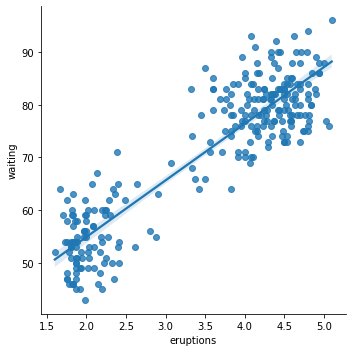

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data_erupt = pd.read_csv('data/faithful.csv').drop(columns = ['Unnamed: 0'])
sns.lmplot(x = 'eruptions', y = 'waiting', data = data_erupt)
plt.show()

Even when the dependent variable/target is discrete:
- with an understood order or if its a quantity

Still a regression problem


**Example:** number of successful mating partners an elephant has as a function of elephant age

<center><img src = "images/matings.png" ></center>
<center> Poisson regressor is appropriate for count data like this </center>

#### Classification

Many cases where target values represent a category or type.
- numerical encoding of classes do not imply an order

In [89]:
penguin_df = sns.load_dataset('penguins').dropna()
gentoo_df = penguin_df.loc[
    penguin_df.species == 'Gentoo',
    ['body_mass_g', 'sex']]

gentoo_df.head()

,body_mass_g,sex
220,4500.0,Female
221,5700.0,Male
222,4450.0,Female
223,5700.0,Male
224,5400.0,Male


Label encode the sex:
- scikit learn's label encoder

Convert sex categories to numeric

In [90]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
gentoo_df['sex'] = label_enc.fit_transform(
    gentoo_df['sex'])

In [20]:
gentoo_df.head()

,body_mass_g,sex
220,4500.0,0
221,5700.0,1
222,4450.0,0
223,5700.0,1
224,5400.0,1


Example of a **binary** classification problem.
- Two outcomes/classes encoded as 0 and 1
- Using feature(s) to predict whether class 0 or 1

Looking at the gentoo body masses by sex:

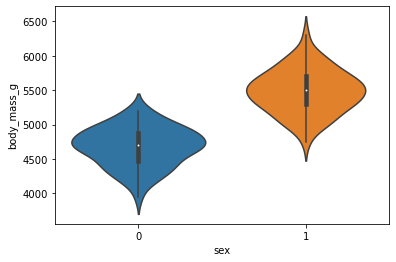

In [21]:
sns.violinplot(y = 'body_mass_g', x = 'sex', 
               data = gentoo_df)
plt.show()

In this case: useful to view it as a scatter plot as well

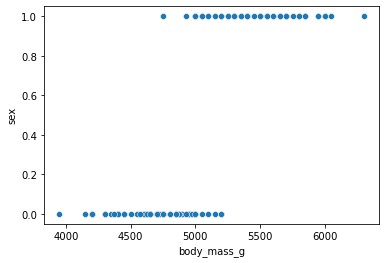

In [22]:
sns.scatterplot(x = 'body_mass_g', y = 'sex', 
                data = gentoo_df)
plt.show()

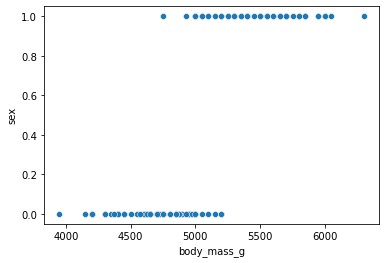

In [23]:
sns.scatterplot(x = 'body_mass_g', y = 'sex', 
                data = gentoo_df)
plt.show()

- Can see transition from 0 to 1:
    - occuring around body_mass = 5000 g

One strategy would be:
- Linear regression 
- If predicted sex > 0.5, then Male
- else Female

In [91]:
from sklearn.linear_model import LinearRegression
import numpy as np
lr = LinearRegression()
X = gentoo_df['body_mass_g'].values.reshape(-1,1)
y = gentoo_df['sex']
lr.fit(X,y)

LinearRegression()

In [92]:
x_plot_range = np.linspace(4000,6000,10)
y_pred = lr.predict(x_plot_range.reshape(-1,1))


In [93]:
# find x value for which value predicts y = 0.5
y_thresh = 0.5
x_seperator_OLS = (y_thresh - lr.intercept_)/lr.coef_[0]

In [27]:
%%capture OLS_seperator
fig, ax = plt.subplots(figsize = (8,5))
sns.scatterplot(x = 'body_mass_g', y = 'sex', 
                data = gentoo_df, ax = ax, label = 'data')
ax.plot(x_plot_range, y_pred, c = 'r', label = 'OLS_fit')
ax.axvline(x_seperator_OLS, c = 'g', linestyle = '--', label = 'class seperator')
ax.legend()

plt.show()

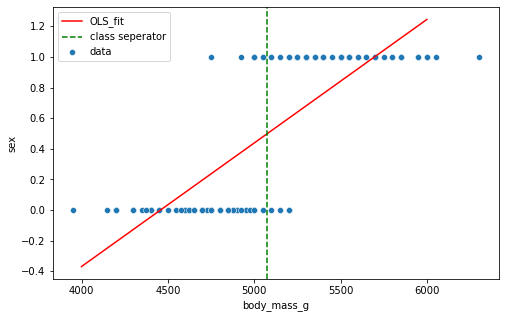

In [28]:
OLS_seperator()

While this looks good:
- is actually a dumb model

- 0 and 1 are not numerically related
- hence: OLS doesnt mean anything.
- using it as a hack way of generating class boundary:
    - predicts values that are out of bounds of target

Also dumb for another less obvious reason:
- Let's add four sample points for males at body masses greater than 5500

In [94]:
from scipy.stats import uniform

m = 4
X_m = uniform.rvs(5500, 2000, 
                    size = m, random_state = 42).reshape(-1,1)

y_m = np.ones(m).reshape(-1,1)
y_fm = np.zeros(m).reshape(-1,1)

X_new = np.vstack((X, X_m))
y_new = np.vstack((y.values.reshape(-1,1), y_m))

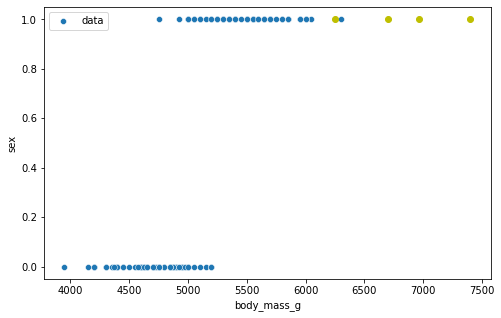

In [30]:
fig, ax = plt.subplots(figsize = (8,5))
sns.scatterplot(x = 'body_mass_g', y = 'sex', 
                data = gentoo_df, ax = ax, label = 'data')
ax.scatter(X_m, y_m, c = 'y')
ax.legend()

plt.show()

In [31]:
%%capture boundary_shift
lr2 = LinearRegression()
lr2.fit(X_new,y_new)
y_pred2 = lr2.predict(x_plot_range.reshape(-1,1))
x_seperator_OLS2 = (y_thresh - lr2.intercept_)/lr2.coef_[0]

fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(X_new, y_new, label = 'data')
ax.scatter(X_m, y_m, c = 'y')
ax.plot(x_plot_range, y_pred, c = 'r', label = 'OLS_fit')
ax.plot(x_plot_range, y_pred2, c = 'magenta', label = 'OLS_fit2')
ax.axvline(x_seperator_OLS, c = 'g', linestyle = '--', label = 'class seperator')
ax.axvline(x_seperator_OLS2, c = 'magenta', linestyle = '--', label = 'new class seperator')


ax.legend()

plt.show()

In [32]:
%%capture boundary_shift_closer

lr2 = LinearRegression()
lr2.fit(X_new,y_new)
y_pred2 = lr2.predict(x_plot_range.reshape(-1,1))
x_seperator_OLS2 = (y_thresh - lr2.intercept_)/lr2.coef_[0]

fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(X_new, y_new, label = 'data')
ax.plot(x_plot_range, y_pred, c = 'r', label = 'OLS_fit')
ax.plot(x_plot_range, y_pred2, c = 'magenta', label = 'OLS_fit2')
ax.axvline(x_seperator_OLS, c = 'g', linestyle = '--', label = 'class seperator')
ax.axvline(x_seperator_OLS2, c = 'magenta', linestyle = '--', label = 'new class seperator')
plt.xlim(4000,6500)

ax.legend()

plt.show()

Looking at the new linear model:
- boundary shifts due to new points

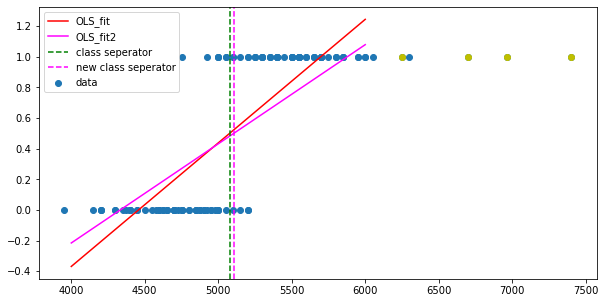

In [33]:
boundary_shift()

A closer look nearer the transition

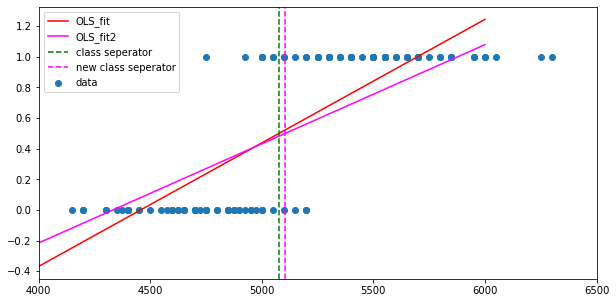

In [34]:
boundary_shift_closer()

Classification boundary:
- should not be dependent on observations far from boundary
- influenced by extreme values

Want to focus on the features space in the transition 

Becomes very sensitive to:
- specifics of train data
- outliers

Linear regression for classification is a very high variance model.

**Gets much worse when we have more (>1) features**

Need set of new model architectures to deal with this:

- Start with one of the simplest models apt for binary classification

#### Logistic Regression

- Don't model the target labels $y$ vs features $X$ directly
- Model the probability $P(sex = 1| mass)$ 

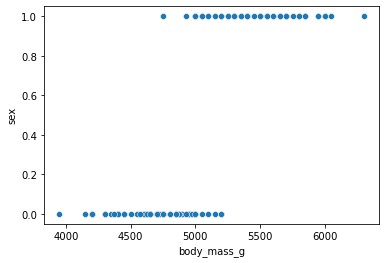

In [35]:
sns.scatterplot(x = 'body_mass_g', y = 'sex', 
                data = gentoo_df)
plt.show()

Expect $P(sex = 1| mass)$  to behave smoothly here:
- from $P(sex = 1| mass) = 0$ for the lower end of body masses
- to $P(sex = 1| mass) = 1$ for the higher end of body masses

Probability as a function of $X$:
- might want it to look like this

In [37]:
%%capture sigmoid_data
def sigmoid(x, loc, scale):
    z = scale*(x - loc)
    a = 1/(1 + np.exp(-z))
    
    return a 

x_r = np.linspace(4000, 6200)

font = {'family': 'arial',
        'weight': 'normal',
        'size': 18,
        }


fig, ax1 = plt.subplots(figsize = (8,5))
ax2 = ax1.twinx()
sns.scatterplot(x = 'body_mass_g', y = 'sex', color = 'blue',
                data = gentoo_df, ax = ax1)
ax2.plot(x_r, sigmoid(x_r, 5100, .0085), c = 'r')

ax1.set_xlabel('Body Mass (g)')
ax1.set_ylabel('Y', color='b', fontdict = font)
ax2.set_ylabel(r'$P(Y=1|mass)$', color='r', fontdict = font)


ax1.set_yticks([0,1])
ax2.tick_params(axis='y', colors='red', labelsize = 15)
ax2.spines['right'].set_color('red')
ax2.spines['left'].set_visible(False)
ax1.tick_params(axis='y', left = True, colors='blue', labelsize = 15)
ax1.spines['left'].set_color('blue')

plt.xlim(4000,6200)
plt.show()

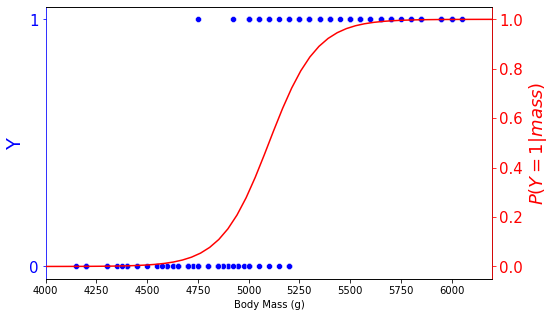

In [38]:
sigmoid_data()

#### Decision criterion of classifier based on probability

- When $P(sex = 1| mass) > 0.5 \rightarrow$ Class 1
- When $P(sex = 1| mass) \leq 0.5 \rightarrow$ Class 0

This function for the probability of class 1 vs class 0:
- known as the **sigmoid function** 

For a single feature $X$, the sigmoid function takes a form:

$$ \sigma(x | w_1, w_0) = \frac{1}{1 + exp\Big[-(w x + b)\Big]} $$

where $w$ is a weight parameter and $b$ is a bias parameter.

In [95]:
# in python form

def sigmoid_func(x, w, b):
    z = w*x + b
    a = 1/(1 + np.exp(-z))
    
    return a 

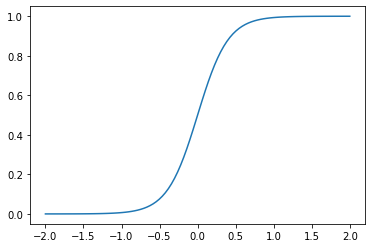

In [96]:
xra = np.linspace(-2,2,100)
plt.plot(xra,sigmoid_func(xra, 5, 0))

We'll see what $w$, $b$ mean in a second:
- note inside exponential $z = w x + b $

A linear function in there:
- we'll see what this linear function defines soon.

Useful to scale/center a feature set $X$:

In [97]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train) # transformed X_train


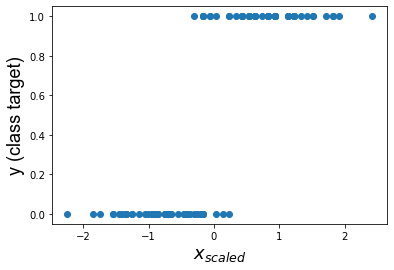

In [98]:
plt.scatter(X_train_scaled, y_train)
plt.ylabel('y (class target)', fontdict = font)
plt.xlabel(r'$x_{scaled}$', fontdict = font)
plt.show()

This scaling becomes very important when:
- dealing with multiple features 
- regularizing model 
- visualizing effect of weights $w$, $b$

What Logistic Regression does:
- Gets values of $w_1$ and $w_0$ of sigmoid function:

$$ \sigma(x | w_1, w_0) = \frac{1}{1 + exp\Big[-(w x + b)\Big]} $$


- for which the observed data is the most probable.

*Fitting parameters:* 
- best approximating observed class obervations as function of $X$
- best modeling the transition region (extent/location)

In [43]:

from bokeh.layouts import column,row
from bokeh.models import ColumnDataSource, Slider, TextInput, Select
from bokeh.plotting import figure, output_file, show
from bokeh.io import show, output_notebook
from bokeh.themes import Theme
import yaml
import numpy as np
output_notebook()


def bk_app(doc):
    x_rang = np.linspace(-2,2, 100)
    sigm = sigmoid_func(x_rang, w = 5, b = 0 )
    sigm_df = pd.DataFrame({'x': x_rang, 'F': sigm})
    

    source = ColumnDataSource(sigm_df)

    # Create plots and widgets
    plot = figure()
    plot.line('x', 'F', source = source, line_width=3, line_alpha=1, color = 'red', legend_label = 'P(Y=1|X)')
    plot.circle(X_train_scaled.ravel(), y_train)
    # Create Slider object
     
    w_val = Slider(start=-30, end=30, value=5, step=0.1, title=r'w (weight)')  
    b_val = Slider(start=-10, end=10, value=0, step=0.1, title='b (bias)')  
    

    # Adding callback code
    def callback(attr, old, new):
        w1 = w_val.value
        w0 = b_val.value
        
        sigm = sigmoid_func(x_rang, w1, w0)
        sigm_df['F'] = sigm

        source.data = sigm_df


    w_val.on_change('value', callback)
    b_val.on_change('value', callback)

    doc.add_root(column(
        row(w_val, b_val),
        plot
        
    ))



    doc.theme = Theme(json=yaml.load("""
        attrs:
            Figure:
                background_fill_color: white
                outline_line_color: white
                toolbar_location: above
                height: 450
                width: 600
    """, Loader=yaml.FullLoader))



Loading BokehJS ...

In [44]:
show(bk_app, notebook_url="http://localhost:8888")

- $w$ controls:
    - transition width
    - orientation of classification boundary

- $b$ controls:
    - location of decision boundary

The weight $w$, bias $b$, and decision boundary are tuned by:
- maximizing the probability of the data
- same as minimizing a new type of cost function: the binary cross entropy

**Don't stress about this: we'll see this next lecture.**

For now:
- use sklearn's LogisticRegression()
- see what we get

In [99]:
from sklearn.linear_model import LogisticRegression

logreg_clf = LogisticRegression()

Fit the model to the standardized training data.

In [100]:
logreg_clf.fit(X_train_scaled, y_train)

LogisticRegression()

We have now fit the weight $w$ (coefficients) and $b$ (bias):

In [47]:
logreg_clf.coef_

array([[3.05780409]])

In [48]:
logreg_clf.intercept_

array([0.07385177])

Logistic regression has a new method:
- .predict_proba(X)

Predicts probability for class 0 and class 1: column of probabilities for each class


Can use this to visualize our model's estimation of $P(Y = 1|X)$

In [101]:
# create a range of scaled X-values
x_scale_range = \
np.linspace(-2.5,2.5, 100).reshape(-1,1)

# probability of data point belonging 
# to each class as a function of x
class_probabilities = \
logreg_clf.predict_proba(x_scale_range)

# output first 5 elements
class_probabilities[-5::]

array([[5.20658979e-04, 9.99479341e-01],
       [4.42265712e-04, 9.99557734e-01],
       [3.75671327e-04, 9.99624329e-01],
       [3.19101225e-04, 9.99680899e-01],
       [2.71047367e-04, 9.99728953e-01]])

Unpack probabilities for females (0) and males (1):

In [102]:
class_proba_0 = class_probabilities[:,0]
class_proba_1 = class_probabilities[:,1]

Visualize the probability of an observation at $X$:
- belonging to class 0
- belonging to class 1

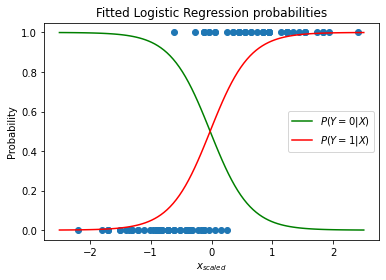

In [51]:
fig, ax = plt.subplots()
ax.plot(x_scale_range, class_proba_0, c ='g', label = r'$P(Y=0|X)$')
ax.plot(x_scale_range, class_proba_1, c = 'r', label = r'$P(Y=1|X)$')
ax.scatter(X_train_scaled, y_train )
ax.set_title('Fitted Logistic Regression probabilities')
ax.set_ylabel('Probability')
ax.set_xlabel(r'$x_{scaled}$')
ax.legend()
plt.show()

#### The decision boundary
- Role of the linear function $ z = wx+b$?

where 
$$\sigma(w x + b) = \frac{1}{1+\exp{\Big[-(w x + b)\Big]}} $$ now expressed as $$\sigma(z) = \frac{1}{1+\exp{[-z]}} $$

When $z$ = 0:
- Evaluating sigmoid function (i.e. $P(Y = 1 | X)$ )

In [52]:
sigz = lambda z: 1/(1 + np.exp(-z))

In [53]:
sigz(0)

0.5

So what is the role of the linear function 

$$ z = w x + b $$

in all of this?

$P(Y = 1 | X)$ = 0.5 at $z = 0$ 

- Determine class 1 when $z > 0$
- Determine class 0 when $z < 0$

$$ z = w x + b = 0$$ defines a **decision boundary**

Plotting the decision boundary logistic regression found:

$$ 0 = wx +b $$

In [103]:
x_decision  = \
-logreg_clf.intercept_/logreg_clf.coef_

x_decision

array([[-0.04065912]])

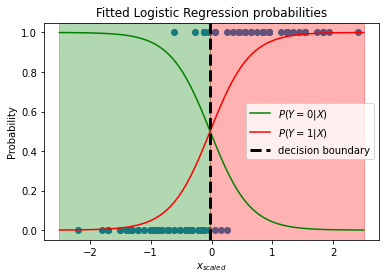

In [55]:
fig, ax = plt.subplots()
ax.plot(x_scale_range, class_proba_0, c ='g', label = r'$P(Y=0|X)$')
ax.plot(x_scale_range, class_proba_1, c = 'r', label = r'$P(Y=1|X)$')
ax.scatter(X_train_scaled, y_train )
ax.axvline(x_decision, c = 'black', linewidth = 3, linestyle = '--', label = 'decision boundary')
ax.axvspan(-2.5, x_decision[0][0], color ='g', alpha = 0.3)
ax.axvspan(x_decision[0][0], 2.5, color ='r', alpha = 0.3)

ax.set_title('Fitted Logistic Regression probabilities')
ax.set_ylabel('Probability')
ax.set_xlabel(r'$x_{scaled}$')
ax.legend()
plt.show()

Admittedly, the visualization on scaled x-axis is a little dumb:
- fitted standard scaler has .inverse_transform() method
- use this on the array of x values

In [56]:
x_true_range = ss.inverse_transform(x_scale_range)

Repeat plot but with true range:

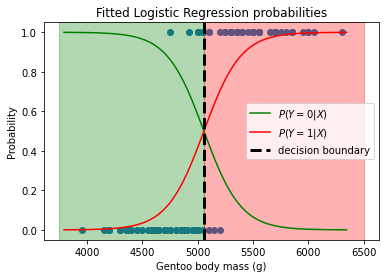

In [57]:
fig, ax = plt.subplots()
ax.plot(x_true_range, class_proba_0, c ='g', label = r'$P(Y=0|X)$')
ax.plot(x_true_range, class_proba_1, c = 'r', label = r'$P(Y=1|X)$')
ax.scatter(X_train, y_train )

# true value of the decision boundary
x_true_decision = ss.inverse_transform(x_decision)

ax.axvline(x_true_decision, c = 'black', linewidth = 3, linestyle = '--', label = 'decision boundary')
ax.axvspan(3750, x_true_decision[0][0], color ='g', alpha = 0.3)
ax.axvspan(x_true_decision[0][0], 6500, color ='r', alpha = 0.3)

ax.set_title('Fitted Logistic Regression probabilities')
ax.set_ylabel('Probability')
ax.set_xlabel('Gentoo body mass (g)')
ax.legend()
plt.show()

Logistic regression is a *soft* classifier:
- assigns probabilities/certainties to class assignment

Visualizing the probability/confidence levels of:
- assigning male $Y=1$ 
- given $X$ (gentoo body mass)

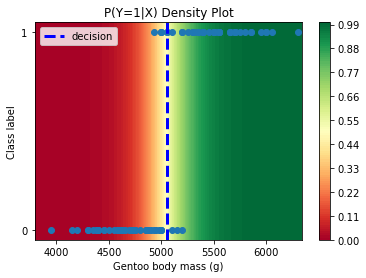

In [108]:
y = np.linspace(-0.05,1.05, 5)

#allows us to create a grid for contour plotting
xx_true, yy = np.meshgrid(x_true_range, y)

# gets prediction for each 
zz = np.tile(
    logreg_clf.predict_proba(
        x_scale_range)[:,1].reshape(-1,1), len(y)).T

plt.contourf(xx_true, yy, zz, 99, cmap='RdYlGn')
plt.colorbar()
plt.scatter(X_train, y_train)
plt.axvline(x_true_decision, c = 'blue', linewidth = 3, linestyle = '--', label = 'decision')
plt.yticks([0,1])
plt.title('P(Y=1|X) Density Plot')
plt.ylabel('Class label')
plt.xlabel('Gentoo body mass (g)')
plt.legend()
plt.show()

Logistic regression:
- gives us a band of uncertainty about decision boundary
- optimizes (based on data):
    - uncertainty region 
    - boundary location

#### Getting the classifier accuracy on the training set
- .score(X_train, y_train) 

Fraction of correct classifications over training set

In [118]:
# remember: our logistic regression is fit on the SCALED features
logreg_clf.score(X_train_scaled, y_train)

0.9052631578947369

Our logistic regression is fitting well to the training set.

#### Logistic Regression at Test time

Want to make predictions on the test set:
- get class membership based on $X$
- get probabilities for being in each class based on $X$

- .predict(X_test)
- .predict_proba(X_test)

But need to be careful:
- fitted and transformed StandardScaler on train set
- need to transform test set with same StandardScaler fit to the train set

In [110]:
X_test_scaled = ss.transform(X_test)
X_test_scaled

array([[ 1.42176582],
       [-0.75674633],
       [-0.45967649],
       [ 1.71883566],
       [ 1.5207891 ],
       [-0.65772305],
       [-0.06358337],
       [-0.26162993],
       [ 1.22371927],
       [ 1.02567271],
       [ 0.62957959],
       [ 0.23348647],
       [ 0.13446319],
       [ 1.02567271],
       [ 0.33250975],
       [-0.55869977],
       [-1.74697912],
       [ 0.33250975],
       [ 0.03543991],
       [ 0.92664943],
       [-1.74697912],
       [-0.65772305],
       [-0.36065321],
       [-0.85576961]])

In [111]:
X_test

array([[5800.],
       [4700.],
       [4850.],
       [5950.],
       [5850.],
       [4750.],
       [5050.],
       [4950.],
       [5700.],
       [5600.],
       [5400.],
       [5200.],
       [5150.],
       [5600.],
       [5250.],
       [4800.],
       [4200.],
       [5250.],
       [5100.],
       [5550.],
       [4200.],
       [4750.],
       [4900.],
       [4650.]])

Now we can pump this in to get the predictions:

In [112]:
y_pred = logreg_clf.predict(X_test_scaled)

y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0])

In [113]:
logreg_clf.predict_proba(X_test_scaled)

array([[0.00877146, 0.99122854],
       [0.91009755, 0.08990245],
       [0.79486718, 0.20513282],
       [0.00337577, 0.99662423],
       [0.00638407, 0.99361593],
       [0.88024197, 0.11975803],
       [0.51851778, 0.48148222],
       [0.67135308, 0.32864692],
       [0.01650847, 0.98349153],
       [0.03085759, 0.96914241],
       [0.10278864, 0.89721136],
       [0.29189376, 0.70810624],
       [0.36213695, 0.63786305],
       [0.03085759, 0.96914241],
       [0.23035508, 0.76964492],
       [0.84219088, 0.15780912],
       [0.99599364, 0.00400636],
       [0.23035508, 0.76964492],
       [0.43880875, 0.56119125],
       [0.04201015, 0.95798985],
       [0.99599364, 0.00400636],
       [0.88024197, 0.11975803],
       [0.7377708 , 0.2622292 ],
       [0.93307605, 0.06692395]])

Calculating the test score accuracy:

In [114]:
logreg_clf.score(X_test_scaled, y_test)

0.9166666666666666

Also doing very well on test set.

Another useful way to check accuracy is:

In [115]:
from sklearn.metrics import accuracy_score

In [116]:
accuracy_score(y_test, y_pred)

0.9166666666666666

In this low dimension, can visualize the predictions on our test set:

In [67]:
# putting predictions into a dataframe
pred_df = pd.DataFrame({'body_mass': X_test.flatten(), 
              'y_pred': y_pred.flatten(), 
                        'y_true': y_test})

print(pred_df.head())

     body_mass  y_pred  y_true
295     5800.0       1       1
325     5500.0       1       1
230     4650.0       0       0
242     4400.0       0       0
305     5600.0       1       1


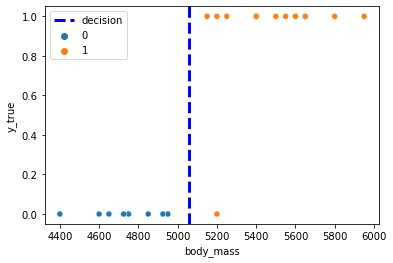

In [68]:
sns.scatterplot(x = 'body_mass',
                y = 'y_true', hue = 'y_pred',
                data = pred_df)
plt.axvline(x_true_decision, c = 'blue', linewidth = 3, linestyle = '--', label = 'decision')
plt.legend()
plt.show()

Very good generalization on unseen data.

#### Logistic Regression in higher dimensions

Decide between penguin species:
- Gentoo
- Adelie

based on bill length and body mass measurements

Loading in the relevant data

In [119]:
col_list = ['bill_length_mm', 'body_mass_g', 'species']
reduced_pg_df = penguin_df[col_list]

reduced_pg_df =\
reduced_pg_df[reduced_pg_df['species'] != 'Chinstrap']
reduced_pg_df.head()

,bill_length_mm,body_mass_g,species
0,39.1,3750.0,Adelie
1,39.5,3800.0,Adelie
2,40.3,3250.0,Adelie
4,36.7,3450.0,Adelie
5,39.3,3650.0,Adelie


In [120]:
reduced_pg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265 entries, 0 to 343
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bill_length_mm  265 non-null    float64
 1   body_mass_g     265 non-null    float64
 2   species         265 non-null    object 
dtypes: float64(2), object(1)
memory usage: 8.3+ KB


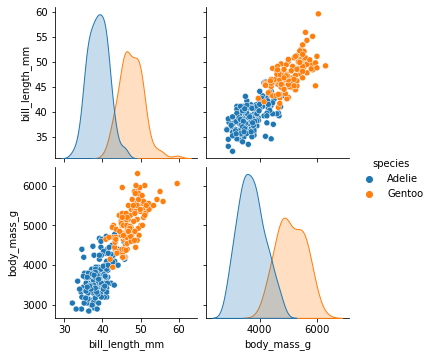

In [71]:
sns.pairplot(reduced_pg_df, hue = 'species')
plt.show()

Two species look like they can be separated:
- by a line/plane in this feature space
- *linear separability* of classes in feature space

Logistic regression is a suitable model for these situations:
- model class probabilities with sigmoid function

$$P(Y=1|x) = \sigma(\textbf{w}^T \textbf{x} + b ) = \sigma(z )$$
$$ z = \textbf{w}^T \textbf{x} + b $$

<center>$ \textbf{w} = \begin{pmatrix} w_{l} \\ w_{m} \end{pmatrix} $ and where $ \textbf{x} = \begin{pmatrix}  l_{bill} \\ m \end{pmatrix}$ </center>


<center>and where $ b $ is bias.</center>

Linear function that generates decision boundary:
$$z = w_l l_{bill}+ w_m m + b$$

when $z = 0$

Generates a decision line in our 2D feature space: $$w_d d_{bill}+ w_m m + b = 0$$

implies that:

$$ m = \frac{w_l}{- w_m}l_{bill} + \frac{ b }{-w_m} $$

which is a line. We'll see this in a moment.

First convert targets/labels (this can be done before the train test split...just relabeling):

In [121]:
lab_enc_peng= LabelEncoder()
lab_enc_peng.fit(reduced_pg_df['species'])

LabelEncoder()

In [122]:
X = reduced_pg_df.drop(columns = ['species'])
y = lab_enc_peng.transform(reduced_pg_df['species']) # transformed to integer labels

Check out the feature matrix and label encoding:

In [123]:
X.head()

,bill_length_mm,body_mass_g
0,39.1,3750.0
1,39.5,3800.0
2,40.3,3250.0
4,36.7,3450.0
5,39.3,3650.0


In [127]:
y[0:5]

array([0, 0, 0, 0, 0])

Now we can scale/center the feature matrix X for logistic regression.

- apply the StandardScaler

##### Wrong! 

Train test split first or data leakage.

In [128]:
# 70-30 train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

Now we can fit the standard scaler to the train set.

Transform the test set.

In [129]:
ss_2D = StandardScaler()
X_train_scaled = ss_2D.fit_transform(X_train)
X_test_scaled = ss_2D.transform(X_test) 

Define/fit a logistic regression on the scaled train set:

In [130]:
logreg_clf2D = LogisticRegression()
logreg_clf2D.fit(X_train_scaled, y_train)

LogisticRegression()

In [131]:
logreg_clf2D.coef_

array([[2.41837283, 2.39784162]])

In [132]:
logreg_clf2D.intercept_

array([-0.64179173])

The coefficients are weight vector $\textbf{w}$ and intercept is bias $b$

How good is the fit to the train set?
- use .score() method

In [133]:
logreg_clf2D.score(X_train_scaled, y_train)

0.9513513513513514

View the predictions of the model with the **train** set plotted

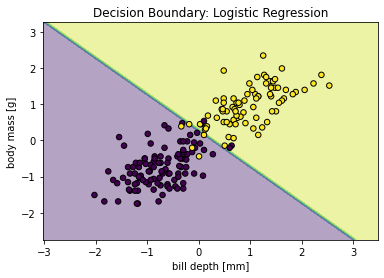

In [134]:
X_2Dn = X_train_scaled # scaled features
X_2D = X_train # features on original scale

x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1

xx_n, yy_n = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

f, ax = plt.subplots()

Z = logreg_clf2D.predict(np.c_[xx_n.ravel(), yy_n.ravel()])
Z = Z.reshape(xx_n.shape)
ax.contourf(xx_n, yy_n, Z, alpha=0.4)
ax.scatter(X_2Dn[:, 0], X_2Dn[:, 1], c = y_train, s=30, edgecolor="k")
ax.set_xlabel('bill depth [mm]')
ax.set_ylabel('body mass [g]')
ax.set_title('Decision Boundary: Logistic Regression')

plt.show()

Predictions on the test set

In [135]:
y_pred_2D = logreg_clf2D.predict(X_test_scaled)
y_pred_2D

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0])

Evaluate classifier accuracy on test set:

In [136]:
accuracy_score(y_test, y_pred_2D)

0.95

Can also get the class probabilities

In [86]:
y_pred_proba_2D = logreg_clf2D.predict_proba(X_test_scaled)
y_pred_proba_2D[0:10]

array([[0.80981263, 0.19018737],
       [0.99824428, 0.00175572],
       [0.8359002 , 0.1640998 ],
       [0.99258152, 0.00741848],
       [0.0484118 , 0.9515882 ],
       [0.96371549, 0.03628451],
       [0.06332089, 0.93667911],
       [0.48874085, 0.51125915],
       [0.0496787 , 0.9503213 ],
       [0.99679601, 0.00320399]])